In [ ]:
!pip install osmnx


In [18]:
import osmnx as ox

In [23]:
place ='Bangalore, India'
G = ox.graph_from_place(place, network_type='drive')

In [ ]:
# place ='Seoul, Korea'
# G2 = ox.graph_from_place(place, network_type='drive')

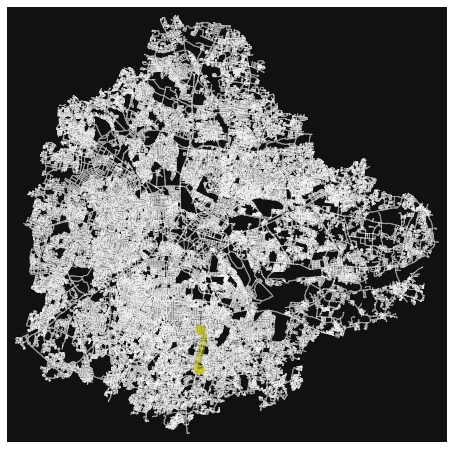

In [ ]:
orig = list(G)[0]
dest = list(G)[120]

# 거리 기반 최단경로 1개 탐색
route = ox.shortest_path(G, orig, dest, weight='length')
fig1_1, ax = ox.plot_graph_route(G, route, route_color='y', route_linewidth=6, node_size=0.5)

# 거리 기반 최단경로 여러개 탐색
routes = ox.k_shortest_paths(G, orig, dest, k=30, weight='length')
fig1_2, ax = ox.plot_graph_routes(G, list(routes), route_colors='y', route_linewidth=4, node_size=0.5)

In [ ]:
# orig = list(G2)[0]
# dest = list(G2)[120]

# route = ox.shortest_path(G, orig, dest, weight='length')
# fig1_1, ax = ox.plot_graph_route(G, route, route_color='y', route_linewidth=6, node_size=0.5)

# routes = ox.k_shortest_paths(G, orig, dest, k=30, weight='length')
# fig1_2, ax = ox.plot_graph_routes(G, list(routes), route_colors='y', route_linewidth=4, node_size=0.5)

In [21]:
G = ox.add_edge_speeds(G)

# 모든 edge 가는 시간 계산
G = ox.add_edge_travel_times(G)

# 평균 속력 (도로 상태에 따라)
edges = ox.graph_to_gdfs(G, nodes=False)
edges['highway'] = edges['highway'].astype(str)
mean_num = edges.groupby('highway')[['length', 'speed_kph', 'travel_time']].mean().round(1)

In [ ]:
# G = ox.add_edge_speeds(G2)

# # calculate travel time (seconds) for all edges
# G = ox.add_edge_travel_times(G2)

# # see mean speed/time values by road type
# edges = ox.graph_to_gdfs(G2, nodes=False)
# edges['highway'] = edges['highway'].astype(str)
# mean_num = edges.groupby('highway')[['length', 'speed_kph', 'travel_time']].mean().round(1)

In [ ]:
orig = list(G)[1]
dest = list(G)[120]
route1 = ox.shortest_path(G, orig, dest, weight='length')
route2 = ox.shortest_path(G, orig, dest, weight='travel_time')


# plot the routes
fig2, ax = ox.plot_graph_routes(G, routes=[route1, route2], route_colors=['r', 'y'],
                               route_linewidth=6, node_size=0)

In [ ]:
orig = list(G2)[1]
dest = list(G2)[120]
route1 = ox.shortest_path(G2, orig, dest, weight='length')
route2 = ox.shortest_path(G2, orig, dest, weight='travel_time')


# plot the routes
fig2, ax = ox.plot_graph_routes(G2, routes=[route1, route2], route_colors=['r', 'y'],
                               route_linewidth=6, node_size=0)